In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('/content/socialsecbabynames.csv')

In [28]:
df

,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
684913,1969,Wynette,F,38
684914,1969,Yalonda,F,38
684915,1969,Aisha,F,37
684916,1969,Alysa,F,37


In [29]:
df.rename(columns={'Number':'Birth' ,"Sex"  :"sex" ,"Births"  : "births"  , "Year" : "year" }, inplace=True)

In [30]:
df.head(10)

,YearOfBirth,Name,sex,Birth
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [ ]:
df

,YearOfBirth,Name,sex,Birth
0,1880,Mary,F,7065.0
1,1880,Anna,F,2604.0
2,1880,Emma,F,2003.0
3,1880,Elizabeth,F,1939.0
4,1880,Minnie,F,1746.0
...,...,...,...,...
63471,1903,Odell,F,14.0
63472,1903,Parthenia,F,14.0
63473,1903,Romaine,F,14.0
63474,1903,Rosalyn,F,14.0


In [32]:
names1880 = pd.read_csv('/content/yob1880.txt', names = ['name', 'sex', 'births'])

In [33]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [34]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [35]:
places = []

for year in range(1880, 2023):
  path = f"/content/yob{year}.txt"
  frame =pd.read_csv(path , names  = ['name', 'sex', 'births'])
  frame['year'] = year
  places.append(frame)

names = pd.concat ( places , ignore_index=True)

In [36]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085532,Zoumana,M,5,2022
2085533,Zuberi,M,5,2022
2085534,Zylon,M,5,2022
2085535,Zymeer,M,5,2022


In [37]:
total_births = names.pivot_table('births' ,index ="year" , columns = "sex" , aggfunc = sum  )

In [39]:
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2018,1699569,1814581
2019,1676568,1792223
2020,1614196,1723649


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

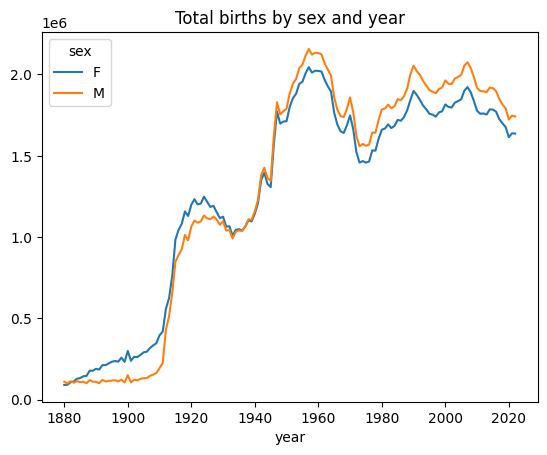

In [40]:
total_births.plot(title = "Total births by sex and year")

In [59]:
def add_prop(group) :
  group['prop'] = group.births / group.births.sum()
  return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [60]:
names

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2022 M   2085532    Zoumana   M       5  2022  0.000003
         2085533     Zuberi   M       5  2022  0.000003
         2085534      Zylon   M       5  2022  0.000003
         2085535     Zymeer   M       5  2022  0.000003
         2085536    Zymeire   M       5  2022  0.000003

[2085537 rows x 5 columns]

In [61]:
names.groupby(['year' ,'sex']) ["prop"].sum()

ValueError: 'year' is both an index level and a column label, which is ambiguous.